In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [3]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rc('legend',fontsize=15) # using a size in points
import pygtc


In [4]:
plabels = ["$M_{*}$", "$\\alpha$", "$\\sigma$"," $\\gamma$", "$\\beta$", "$\\tau$"]

priors = [[9.5,11.5], [-1,7], [0,5], [-2,2], [-3,2], [-2,2]]

fixed = [False, True, True, False, False, False]

### first the alpha permutations

In [5]:
alpha1 = jsm_mcmc.Chain("../../../data/alpha_permutations/mock_1/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=25)

alpha2 = jsm_mcmc.Chain("../../../data/alpha_permutations/mock_2/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=25)

alpha3 = jsm_mcmc.Chain("../../../data/alpha_permutations/mock_3/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=25)

alpha4 = jsm_mcmc.Chain("../../../data/alpha_permutations/mock_4/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=25)

In [6]:
# save_file = "../../../paper_1/figures/alpha_perm.pdf"

In [7]:
colors = ['cornflowerblue', 'orange', 'green', 'red', 'mediumpurple']


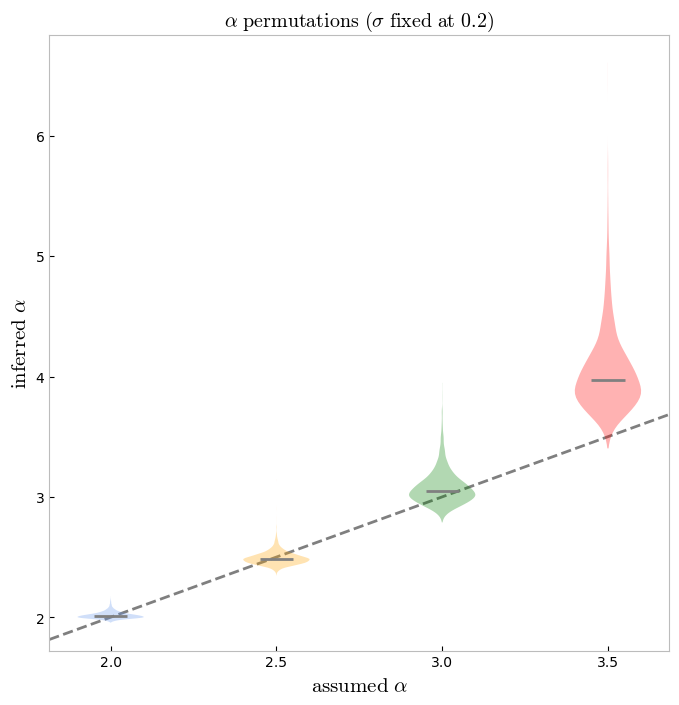

In [8]:
alpha_permutations = [2.0, 2.5, 3.0, 3.5]

data = [alpha1.clean[:,0], alpha2.clean[:,0], alpha3.clean[:,0], alpha4.clean[:,0]]

# Create a violin plot
plt.figure(figsize=(8, 8))
plt.title("$\\alpha\ \mathrm{permutations}\ (\\sigma\ \mathrm{fixed\ at}\ 0.2)$", color="black")
violins = plt.violinplot(data, showmeans=False, showmedians=True, positions=alpha_permutations, widths=0.2, showextrema=False)

for i, violin in enumerate(violins['bodies']):
        violin.set_facecolor(colors[i])

violins['cmedians'].set_color("grey")

plt.xticks(alpha_permutations, ['2.0', '2.5', '3.0', '3.5'])
plt.ylabel('$\mathrm{inferred}\ \\alpha$', fontsize=15)
plt.xlabel("$\mathrm{assumed}\ \\alpha$", fontsize=15)

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='black', scalex=False, scaley=False, zorder=0, alpha=0.5)

#plt.savefig("../../../paper_1/figures/alpha_perm.pdf", bbox_inches='tight')

plt.show()


In [10]:
data = [alpha1.clean, alpha2.clean,  alpha3.clean, alpha4.clean]

chain_labels = ["$\\alpha = $" + alpha1.constraints[0] + "\n $\\sigma = $" + alpha1.constraints[1],
                "$\\alpha = $" + alpha2.constraints[0] + "\n $\\sigma = $" + alpha2.constraints[1],
                "$\\alpha = $" + alpha3.constraints[0] + "\n $\\sigma = $" + alpha3.constraints[1],
                "$\\alpha = $" + alpha4.constraints[0] + "\n $\\sigma = $" + alpha4.constraints[1]]

In [11]:
hmm = np.array([[2.0, 0.2], [2.5, 0.2], [3.0, 0.2], [3.5, 0.2]])

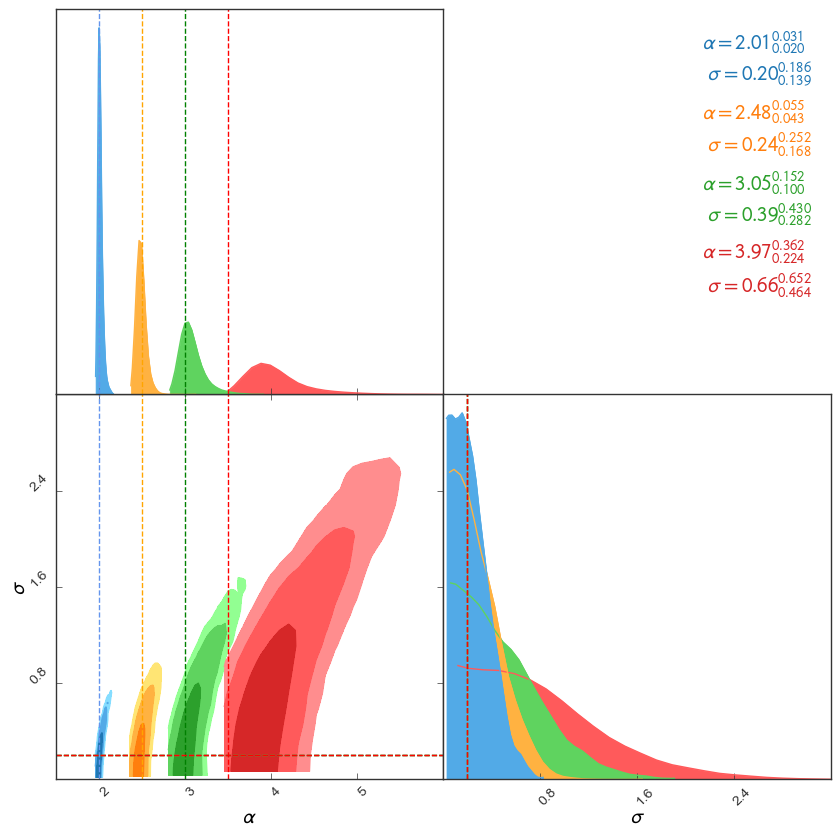

In [15]:
test = jsm_mcmc.MulitChain(data, chain_labels, hmm, fixed)
test.plot_posteriors(truths=hmm, truthColors=colors, truthLineStyles=["--"]*6, filledPlots=True, nContourLevels=3, paramRanges=[[1.5,6], [0,3.2]])